# <font color="red"> Using GaussianNB classifier


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [63]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
sns.set_style('darkgrid')
df = pd.read_csv("diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age,Daigonosis
258,1,193,50,16,375,25.9,0.655,0,51.0,1
31,3,158,76,36,245,31.6,0.851,1,41.0,0
46,1,146,56,0,0,29.7,0.564,0,56.0,1
14,5,166,72,19,175,25.8,0.587,1,24.0,1
197,3,107,62,13,48,22.9,0.678,1,54.0,1


<Axes: >

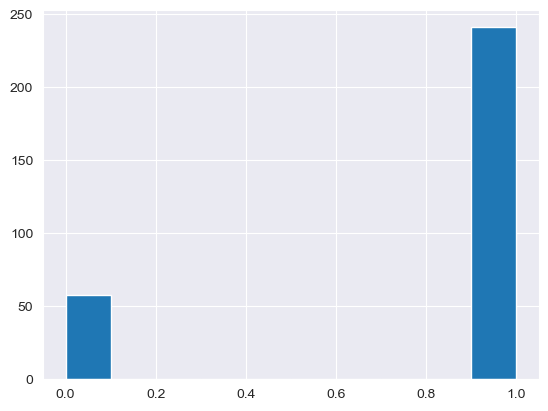

In [90]:
df['Daigonosis'].hist()

<Axes: >

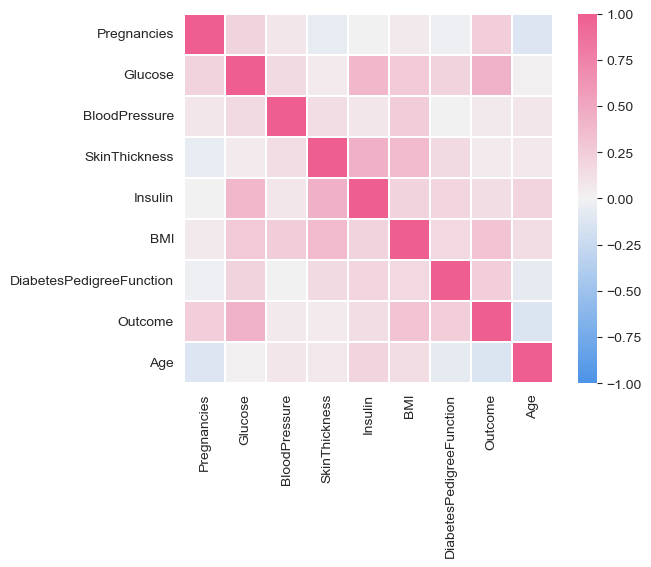

In [89]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center='light', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=0.2)


In [88]:
data = df[
    ['Glucose',
'BloodPressure',
'DiabetesPedigreeFunction',
'Daigonosis']
]
data.head(10)

,Glucose,BloodPressure,DiabetesPedigreeFunction,Daigonosis
0,148,72,0.627,0
1,85,66,0.351,0
2,183,64,0.672,1
3,89,66,0.167,0
4,137,40,2.288,0
5,116,74,0.201,0
6,78,50,0.248,0
7,115,0,0.134,0
8,197,70,0.158,1
9,125,96,0.232,0


c:\Users\Ripon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ripon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ripon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


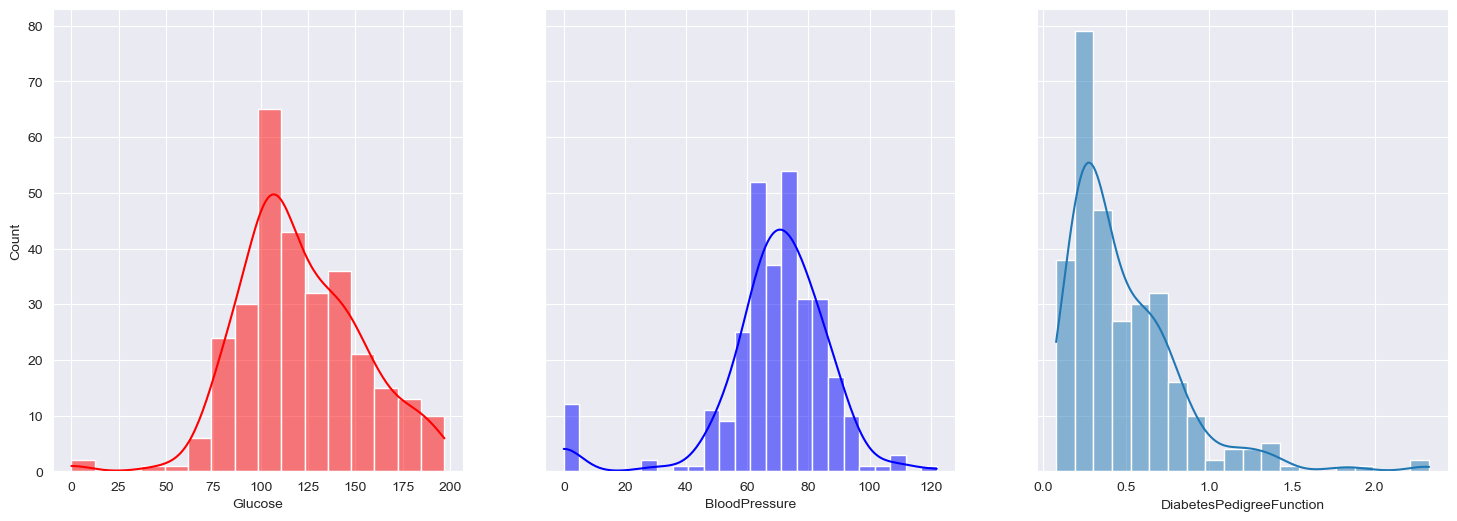

In [91]:

fig, axis = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.histplot(df, ax=axis[0], x="Glucose", kde=True, color='r')
sns.histplot(df, ax=axis[1], x="BloodPressure", kde=True, color='b')
sns.histplot(df, ax=axis[2], x="DiabetesPedigreeFunction", kde=True)

plt.show()

In [92]:
X = df.drop(['Daigonosis'],axis=1)
y = df['Daigonosis']

In [93]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age
0,6,148,72,35,0,33.6,0.627,1,10.0
1,1,85,66,29,0,26.6,0.351,0,11.0
2,8,183,64,0,0,23.3,0.672,1,12.0
3,1,89,66,23,94,28.1,0.167,0,13.0
4,0,137,40,35,168,43.1,2.288,1,14.0
...,...,...,...,...,...,...,...,...,...
294,0,161,50,0,0,21.9,0.254,0,55.0
295,6,151,62,31,120,35.5,0.692,0,56.0
296,2,146,70,38,360,28.0,0.337,1,57.0
297,0,126,84,29,215,30.7,0.520,0,58.0


In [94]:
y

0      0
1      0
2      1
3      0
4      0
      ..
294    1
295    1
296    1
297    1
298    1
Name: Daigonosis, Length: 299, dtype: int64

# Split data into training and testing sets


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create a Gaussian classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(accuracy_score(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()